optimize > solve > solving 81 dof system to machine precision using direct solver
optimize > solve > solver returned with residual 7e-18
optimize > constrained 81/81 dofs
optimize > optimum value 1.02e-03


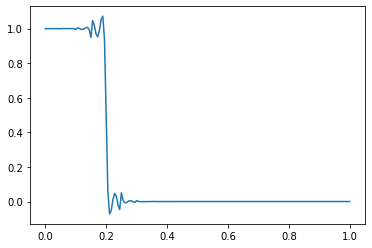

In [29]:
import nutils as ntl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

degree = 4
topo, geom = ntl.mesh.rectilinear([np.linspace(0,1, 21)])
ns = ntl.function.Namespace()
ns.x = geom
ns.N = topo.basis('std', degree = degree)
ns.u = 'N_i ?dofs_i'
ns.pi = np.pi
badbnd, badbnd2 = ntl.function.partition('x_i' @ns, .2)
ns.badbnd = badbnd[0]

sqr = topo.integral(' (u - badbnd)^2 d:x' @ns, degree = degree * 2)
cons = ntl.solver.optimize('dofs', sqr, droptol= 1e-15)

bezier = topo.sample('bezier', 10)
x = bezier.eval('x_i' @ns)
u = bezier.eval('u' @ns, dofs = cons)

plt.plot(x, u)